<a href="https://colab.research.google.com/github/brenascimento/creditriskmlproject/blob/main/Credit_Risk_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

<img src='https://th.bing.com/th/id/OIP.91LHjaw6Buq_kKfgASyI1gHaE8?rs=1&pid=ImgDetMain' align='center' />



---



A empresa alemã de crédito Riska quer reduzir a taxa de inadimplência dos seus clientes, ou seja, o percentual de clientes que não pagam o empréstimo no prazo. Para isso, ela precisa de um modelo de machine learning que possa prever a probabilidade de um cliente ser inadimplente, baseado nas suas características e no histórico de crédito. O modelo deve ser capaz de classificar os clientes em duas categorias: bom ou ruim, de acordo com o seu risco de crédito. Assim, a empresa pode decidir se concede ou não o crédito, e qual o valor e as condições mais adequadas para cada cliente. (história gerada pelo Copilot)

Com isso, meu objetivo é demonstrar minhas habilidades com Análise e Exploração de Dados e também o entedimento de workflow de um projeto de ML.

Utilizaremos os dados da [German Credit Risk with Target](https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk) do Kaggle.

# Colocando os dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Como já é possível visualizar, temos alguns tratamentos para fazer em nossos dados, mas primeiro podemos começar a explorar-los e entender o que é e o que faz cada cada coluna

# Entedimento dos dados
O conjunto de dados criada pela empresa já foram rotulados pelo time de negócio da empresa, vamos ver o que tem por aí.


| Coluna | Tipo | Descrição
---|---|---
| Age | Discreto |Idade do devedor
| Sex | Nominal (texto mas sem ordem) |Sexo do devedor
| Job | Categórica |Númerico: 0 - não qualificado e estrangeiro, 1 - não qualificado e residente do país, 2 - qualificado, 3 - alta qualificação
| Housing | Categórica |text: own = Próprio, rent = Alugado, free = Não Pagante
| Saving accounts (poupança) | Categórica | text - little, moderate, quite rich, rich
| Checking accounts (conta corrente) | Categórica | text - little, moderate, quite rich, rich
| Credit Amount (Quantia de crédito) | Contínuo | Valor de crédito solicitado pelo devedor em Deutsche Mark (Marco Alemão)
| Duration | Inteiro | Duração em meses em que o devedor pagou pelo crédito
| Purpose | Categórico | Propósito para uso do crédito (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
| Risk (váriavel alvo) | Categórico | (text: good, bad) um risco baixo (good) significa em uma alta probabilidade de que o devedor não trará prejuízo para a empresa, enquanto que um risco alto (bad) trará.


Com isso algumas hipóteses podem ser levantadas:
* Os devedores com riscos altos solicitam um valor de crédito maior daqueles que tem um risco baixo? Eles demoram mais para "pagar" os seus créditos?
* Em quais "propósitos" os créditos são mais utilizados pelos devedores (Purpose vs Credit Amount)?
* Qual a relação entre Purpose e a váriavel "Risk"? Será que os devedores que utilizaram seus créditos em férias e viagens tem em sua maioria, um risco classificado como "ruim"? Levando em conta que tempos de férias e viagens podem ser considerados momentos de descontração pela maioria e por isso elas acabam fazendo um uso desenfreado do crédito? Iremos investigar isso.


Com isso, delineamos o que faremos ao longo desse projeto antes de partimos para o ML

1. Limpeza dos Dados
2. Exploração com Data Viz
3. Preparação para os Algoritmos de Machine Learning
4. Treinamento
5. Avaliação

Vamos para mais algumas explorações

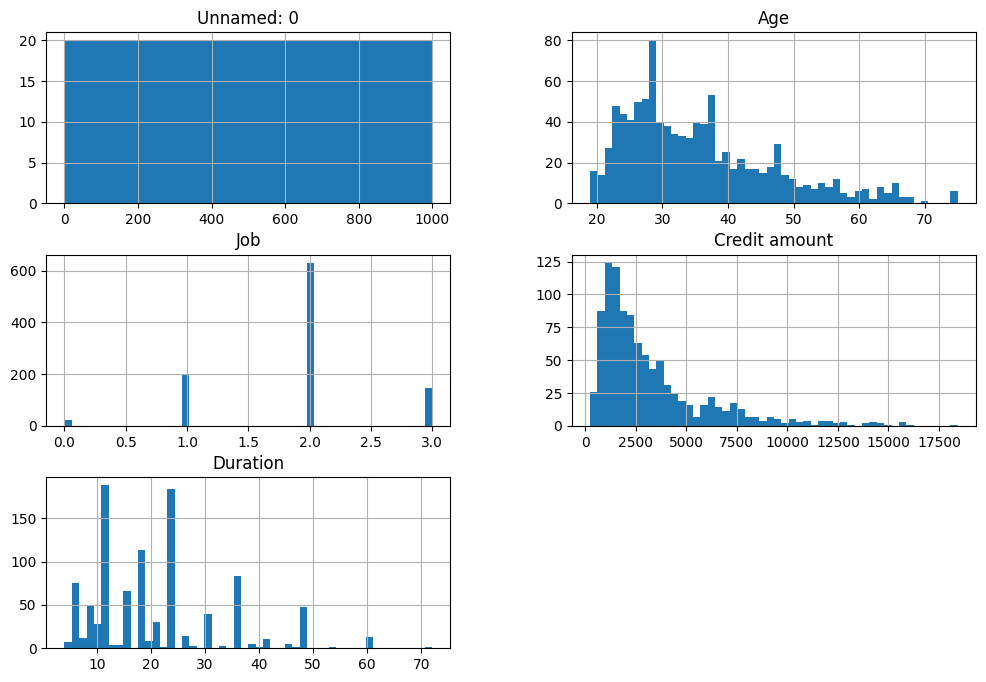

In [3]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

### Os devedores de altos riscos solicitam um valor de crédito maior daqueles que tem um baixo risco? Eles demoram mais para "pagar" os seus créditos?

In [4]:
print("Describe - Conjunto Geral")
display(df.describe())
print("Describe - Risco Baixo")
display(df[df.Risk == 'good'].describe())
print("Describe - Risco Alto")
display(df[df.Risk == 'bad'].describe())

Describe - Conjunto Geral


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Describe - Risco Baixo


,Unnamed: 0,Age,Job,Credit amount,Duration
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,492.960000,36.224286,1.890000,2985.457143,19.207143
std,292.049741,11.381145,0.646914,2401.472278,11.079564
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,243.750000,27.000000,2.000000,1375.500000,12.000000
50%,481.500000,34.000000,2.000000,2244.000000,18.000000
75%,746.500000,42.250000,2.000000,3634.750000,24.000000
max,999.000000,75.000000,3.000000,15857.000000,60.000000


Describe - Risco Alto


,Unnamed: 0,Age,Job,Credit amount,Duration
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,514.760000,33.963333,1.936667,3938.126667,24.860000
std,281.025396,11.222379,0.668940,3535.818955,13.282639
min,1.000000,19.000000,0.000000,433.000000,6.000000
25%,273.750000,25.000000,2.000000,1352.500000,12.000000
50%,541.000000,31.000000,2.000000,2574.500000,24.000000
75%,754.250000,40.000000,2.000000,5141.500000,36.000000
max,998.000000,74.000000,3.000000,18424.000000,72.000000


Olhando para as medidas conseguimos ter alguns insights:
* Sim, os devedores com `Risco alto` geralmente solicitam um valor de crédito **maior** do que os que tem `Risco baixo`(risco baixo) (Média Risco Alto: 3.9K vs Média Risco Baixo: 2.9K)
* E também esses mesmos devedores com `Risco Alto` geralmente demoram mais para pagar os seus créditos do que os devedores de `Risco Baixo` (Média Duração Risco Alto: 24 dias vs Média Duração Risco Baixo: 19 dias)
* 75% dos devedores tem entre 19 a 40 anos de idade
* O tipo de trabalho "2 - Qualificado" é a maioria para os devedores

Como visto na introdução, a empresa quer diminuir a taxa de inadimplência, com isso podemos visualizar a taxa atual de inadimplência.

In [5]:
df.Risk.value_counts(normalize=True) * 100

good    70.0
bad     30.0
Name: Risk, dtype: float64

No nosso conjunto de dados atual, temos 70% de devedores com riscos baixos (good), enquanto que 30% com riscos altos (bad)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# Limpeza dos dados

Primeiramente vemos que há uma coluna chamada "Unnamed: 0", se trata de um resquicio dos dados, podemos excluir essa coluna

In [7]:
df.drop('Unnamed: 0', inplace=True, axis=1)

Conseguimos visualizar que as colunas conta corrente e poupança tem valores vazios, podemos visualizar as colunas que tem nulos e compara-las com as colunas não nulas

In [8]:
display(df[df.isna().any(axis=1)].sample(7))
display(df[df.notna().all(axis=1)].sample(7))

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
100,41,male,1,rent,moderate,NaN,1469,24,car,good
45,35,female,3,own,little,NaN,1393,11,car,good
345,43,female,1,own,little,NaN,1459,15,radio/TV,good
493,38,male,2,own,NaN,moderate,368,6,radio/TV,good
225,27,male,2,own,little,NaN,2613,36,repairs,good
960,30,male,2,rent,little,NaN,1740,6,radio/TV,good
232,35,male,2,own,moderate,NaN,2141,12,radio/TV,good


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
23,44,male,2,own,moderate,moderate,1804,12,car,good
339,31,male,1,own,little,moderate,1521,10,furniture/equipment,good
944,46,female,2,rent,little,little,1845,15,furniture/equipment,good
292,44,female,3,free,little,little,6419,24,car,good
137,66,male,1,own,quite rich,moderate,766,12,radio/TV,bad
604,23,female,2,own,little,rich,1275,10,furniture/equipment,good
620,27,male,2,own,little,moderate,3652,21,business,good


Os dados nulos apresentam riscos altos e baixos sem um padrão especifico, ou seja, podemos presumir que esses dados estão vazios aleatoriamente.

little        0.738066
moderate      0.126071
quite rich    0.077111
rich          0.058752
Name: Saving accounts, dtype: float64


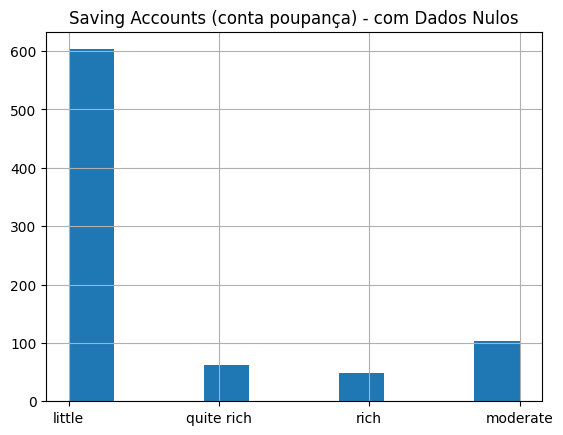

In [9]:
print(df['Saving accounts'].value_counts(normalize=True))
df['Saving accounts'].hist()
plt.title("Saving Accounts (conta poupança) - com Dados Nulos")
plt.show()

little      0.452145
moderate    0.443894
rich        0.103960
Name: Checking account, dtype: float64


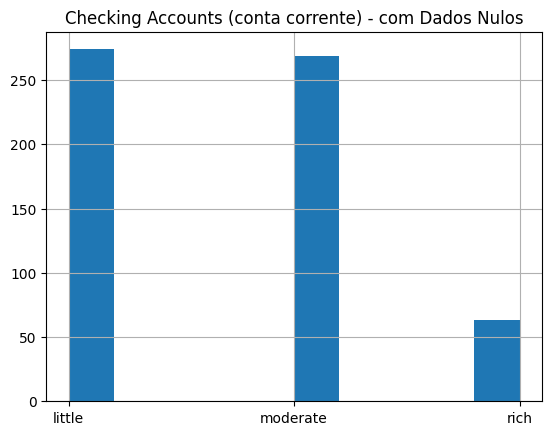

In [10]:
print(df['Checking account'].value_counts(normalize=True))
df['Checking account'].hist()
plt.title("Checking Accounts (conta corrente) - com Dados Nulos")
plt.show()

Podemos ver que em `saving accounts`, a classe `little` é a mais frequente, enquanto que na váriavel `checking accounts`, há uma proporção similar entre `little` e `moderate`.

Podemos notar também que a classe `quite rich` não aparece na coluna `checking accounts`, nessa ocasião precisariamos de mais dados para definir se há `quite rich` ou não.

Com isso, podemos preencher os dados faltantes na mesma proporção, utilizando Python e algumas técnicas como o `random.choice`, isso será importante na hora de preparar o algoritmo para representarmos precisamente a "população" dos nossos dados. Vamos lá!

In [11]:
def fill_proportion(df, col):
  proporcoes = df[col].value_counts(normalize=True)

  df[col].fillna(
      pd.Series(
        np.random.choice(proporcoes.index, p=proporcoes.values, size=len(df))
      ), inplace=True
  )

fill_proportion(df, 'Saving accounts')
fill_proportion(df, 'Checking account')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


little        0.742
moderate      0.126
quite rich    0.073
rich          0.059
Name: Saving accounts, dtype: float64


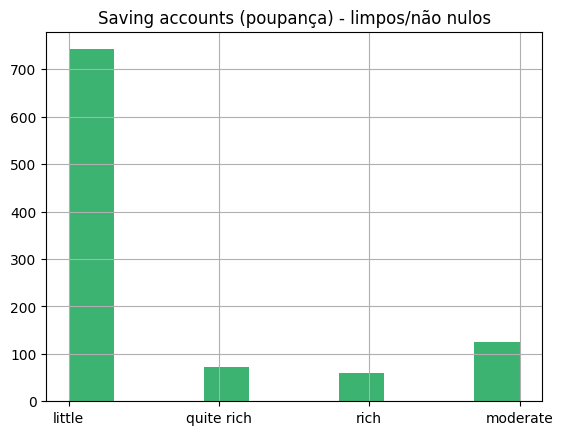

In [12]:
print(df['Saving accounts'].value_counts(normalize=True))
df['Saving accounts'].hist(color='mediumseagreen')
plt.title("Saving accounts (poupança) - limpos/não nulos")
plt.show()

moderate    0.459
little      0.449
rich        0.092
Name: Checking account, dtype: float64


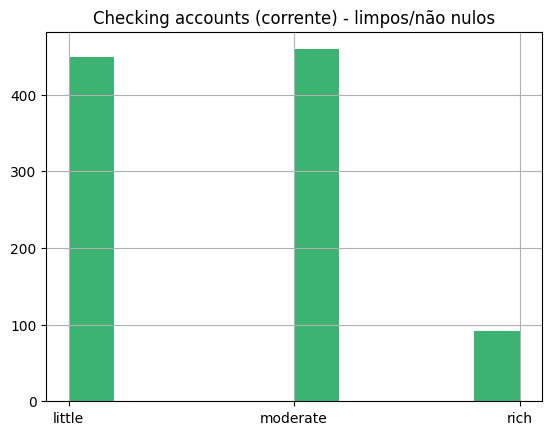

In [13]:
print(df['Checking account'].value_counts(normalize=True))
df['Checking account'].hist(color='mediumseagreen')
plt.title("Checking accounts (corrente) - limpos/não nulos")
plt.show()

Depois de limpos, podemos dar inicio a nossa exploração mais aprofundada dos dados, e também tentaremos responder à nossas hipóteses

# Explorando os dados mais a fundo

Como é possível ver nos gráficos anteriores:**Contas poupanças** com pouco dinheiro são **mais frequentes**, enquanto que há um certo equilibrio em contas do tipo `little` e `moderate` para contas correntes, indicando *uma maior atividade* de uso por parte dos devedores nesse tipo de conta.

A frequência de **pouco dinheiro**(`little`) ser a **maior** na conta poupança indica que a **maioria** dos devedores preferem ter menos dinheiro guardado e mais flexibilidade.

## Em quais "propósitos" os créditos são mais utilizados pelos devedores? Boa parte desse dinheiro é utilizado para férias?

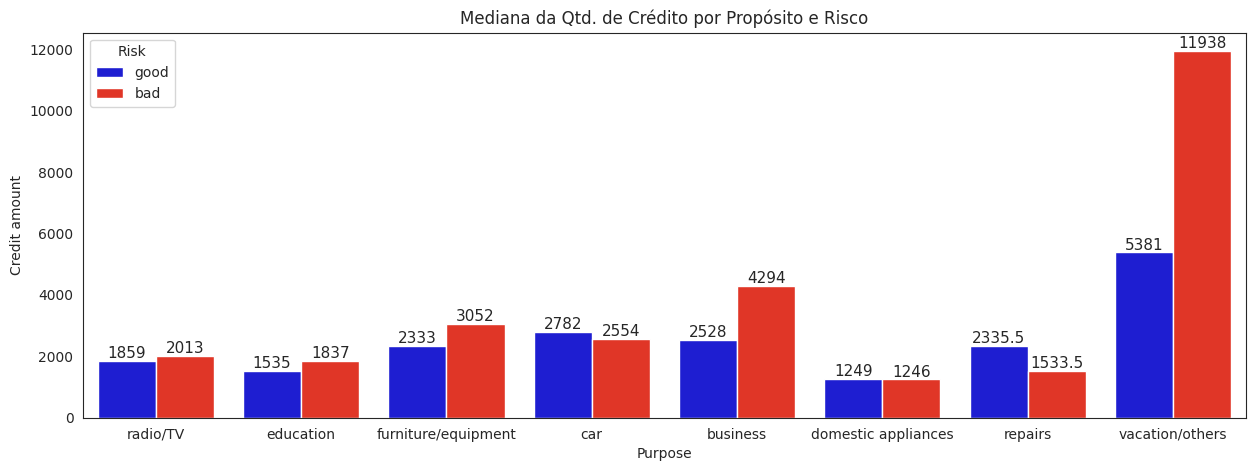

In [14]:
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style('white')

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'style': 'italic',
        'size': 10,
        }


plt.figure(figsize=(15, 5))
# para diminuir a sensbilidade de outliers utilizaremos estimator='median'
ax = sns.barplot(x='Purpose', y='Credit amount', hue='Risk', data=df, estimator='median', errorbar=None,
                 palette=[sns.color_palette('flag')[5], sns.color_palette('flag')[3]])

ax.bar_label(ax.containers[0], fontsize=11, bbox=dict(facecolor='white', edgecolor='none', pad=0.1))
ax.bar_label(ax.containers[1], fontsize=11, bbox=dict(facecolor='white', edgecolor='none', pad=0.1))
ax.set_title("Mediana da Qtd. de Crédito por Propósito e Risco")

plt.show()


Sim, Vacation/Others (férias/outros) é o propósito com mais solicitação de crédito para ambos os riscos

Aqui podemos ve que na maioria dos propósitos, os devedores de **alto risco** *geralmente* solicitam um valor de crédito maior do que os devedores de baixo risco.

Somente em solicitações para **carros**, **reparos** e **aplicações para casa** que os devedores com ***baixo risco*** em média usam **mais** do que os devedores de **alto risco**.

## Preparação para os algoritmos

Depois dos dados limpos e já conhecermos um pouco deles, podemos começar a prepara-los para nosso algoritmo de ML.

Nossos dados estão desbalanceados, vamos balanceados utilizando `imbalanced`

In [15]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


## Feature Engineering



In [16]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,moderate,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [17]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [18]:
for col in df.select_dtypes('object').columns:
  print(col)
  display(df[col].value_counts())
  print()

Sex


male      690
female    310
Name: Sex, dtype: int64


Housing


own     713
rent    179
free    108
Name: Housing, dtype: int64


Saving accounts


little        742
moderate      126
quite rich     73
rich           59
Name: Saving accounts, dtype: int64


Checking account


moderate    459
little      449
rich         92
Name: Checking account, dtype: int64


Purpose


car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64


Risk


good    700
bad     300
Name: Risk, dtype: int64

In [19]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

def preprocess_data(X, y, x_weights, y_weights):
    # Copiando o DataFrame para evitar modificações diretas nos dados originais
    df = X.copy()
    s = y.copy()

    # Aplicando a codificação ordinal
    df.replace(x_weights, inplace=True)

    # Criando o ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('nominal', OneHotEncoder(), ['Sex', 'Purpose', 'Housing']),
            ('scaling', MinMaxScaler(), ['Age', 'Job', 'Credit amount', 'Duration'])
        ],
        remainder='passthrough'
    )

    # Aplicando as transformações
    X_processed = preprocessor.fit_transform(df)

    # Convertendo o resultado de volta para DataFrame
    X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

    # converter a variável target em classificação binária
    s.replace(y_weights, inplace=True)

    smote = SMOTE()

    # balanceando os dados
    X_balanced, y_balanced = smote.fit_resample(X_processed_df, s)

    return X_balanced, y_balanced

risk_weights = {'good':1, 'bad':0}
account_weights = {'little':0, 'moderate':1, 'quite rich':2, 'rich':3}

# Exemplo de uso
X_train, y_train = preprocess_data(X_train, y_train, account_weights, risk_weights)
X_test, y_test = preprocess_data(X_test, y_test, account_weights, risk_weights)

# Exibindo os DataFrames processados
print("X_train após preprocessamento:")
display(X_train.head())
print(X_train.shape)

print("\nX_test após preprocessamento:")
display(X_test.head())
print(X_test.shape)

# Exibindo os DataFrames processados
print("y_train após preprocessamento:")
display(y_train.head())
print(y_train.shape)

print("\ny_test após preprocessamento:")
display(y_test.head())
print(y_test.shape)



X_train após preprocessamento:


,nominal__Sex_female,nominal__Sex_male,nominal__Purpose_business,nominal__Purpose_car,nominal__Purpose_domestic appliances,nominal__Purpose_education,nominal__Purpose_furniture/equipment,nominal__Purpose_radio/TV,nominal__Purpose_repairs,nominal__Purpose_vacation/others,nominal__Housing_free,nominal__Housing_own,nominal__Housing_rent,scaling__Age,scaling__Job,scaling__Credit amount,scaling__Duration,remainder__Saving accounts,remainder__Checking account
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.142857,0.666667,0.111182,0.117647,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.178571,0.666667,0.422874,0.470588,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.982143,0.333333,0.203759,0.014706,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.089286,0.666667,0.402039,0.647059,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.089286,0.666667,0.176234,0.117647,0.0,3.0


(1120, 19)

X_test após preprocessamento:


,nominal__Sex_female,nominal__Sex_male,nominal__Purpose_business,nominal__Purpose_car,nominal__Purpose_domestic appliances,nominal__Purpose_education,nominal__Purpose_furniture/equipment,nominal__Purpose_radio/TV,nominal__Purpose_repairs,nominal__Purpose_vacation/others,nominal__Housing_free,nominal__Housing_own,nominal__Housing_rent,scaling__Age,scaling__Job,scaling__Credit amount,scaling__Duration,remainder__Saving accounts,remainder__Checking account
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.183673,0.666667,0.186467,0.357143,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.163265,1.000000,0.757714,1.000000,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.693878,0.666667,0.377066,0.785714,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.959184,1.000000,0.089927,0.464286,0.0,3.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.183673,0.666667,0.110315,0.250000,1.0,1.0


(280, 19)
y_train após preprocessamento:


0    1
1    0
2    1
3    0
4    1
Name: Risk, dtype: int64

(1120,)

y_test após preprocessamento:


0    1
1    0
2    0
3    0
4    0
Name: Risk, dtype: int64

(280,)


# Treinando e Validando nossos dados

Com os nossos dados limpos e com os atributos transformados, podemos começar a treinar nossos modelos

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np


# Árvore de Decisão
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print("Árvore de Decisão: Média da Acurácia =", np.mean(dt_scores))

# Naive Bayes
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Naive Bayes: Média da Acurácia =", np.mean(nb_scores))

# Random Forest
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest: Média da Acurácia =", np.mean(rf_scores))

# SVM
svm_model = SVC()
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("SVM: Média da Acurácia =", np.mean(svm_scores))

Árvore de Decisão: Média da Acurácia = 0.6839285714285716
Naive Bayes: Média da Acurácia = 0.5973214285714286
Random Forest: Média da Acurácia = 0.7767857142857142
SVM: Média da Acurácia = 0.675


O modelo que melhor performou foi o Random Forest com uma média de acurácia de 0.78, utilizaremos ele para alguns ajustes finos

# Ajustes finos

utilizaremos o GridSearchCV e RandomizedSearchCV para alguns ajustes de hiperparametros do RandomForest

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Definir hiperparâmetros para ajustar
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params_grid = grid_search.best_params_
print("Melhores hiperparâmetros (Grid Search):", best_params_grid)
print("Melhor score: ", grid_search.best_score_)

Melhores hiperparâmetros (Grid Search): {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor score:  0.7848214285714286
